In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,/;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
}

# 1st Page Data

In [3]:
url ="https://www.amazon.in/s?k=shoes&crid=UX6R0SKMLQE5&sprefix=%2Caps%2C216&ref=nb_sb_ss_recent_1_0_recent"
page = requests.get(url, headers = headers)
page

# converting text to HTML
soup = BeautifulSoup(page.text)
soup

P_N = soup.find_all("span", class_="a-size-base-plus a-color-base")
Brand = []
for i in P_N:
    Brand.append(i.text)

C = soup.find_all("h2", class_="a-size-base-plus a-spacing-none a-color-base a-text-normal")
Category = []
for i in C:
    Category.append(i.text)

R = soup.find_all("span", class_="a-size-small a-color-base")
Rating = []
for i in R:
    Rating.append(i.text)

P_O = soup.find_all("span", class_="a-size-mini puis-normal-weight-text s-underline-text")
Product_Orders = []
for i in P_O:
    Product_Orders.append(i.text)

prices = [span.get_text(strip=True) for span in soup.select("span.a-price > span[aria-hidden='true']")]
D_P = prices[::2]
Discount_Price = []
for i in D_P:
    Discount_Price.append(i)

prices = [span.get_text(strip=True) for span in soup.select("span.a-price > span[aria-hidden='true']")]
O_P = prices[1::2]
Original_Price = []
for i in O_P:
    Original_Price.append(i)

Dis = soup.find_all("div", class_ = "a-row a-size-base a-color-base")
Discount = []
for i in Dis:
    text = i.get_text(strip = True)
    match = re.search(r'\((\d+%)\s*off\)', text)
    if match:
        Discount.append(match.group(1))

deal = [d.get_text(strip=True) for d in soup.select("span.a-badge-text")]
Availability = []
for i in deal:
    Availability.append(i)


In [4]:
d = {"Brand" : Brand,
    "Category" : Category,
    "Rating" : Rating,
    "Product_Orders" : Product_Orders,
    "Discount_Price" : Discount_Price,
    "Original_Price" : Original_Price,
    "Discount" : Discount,
    "Availability" : Availability}

In [5]:
max_len = max(len(v) for v in d.values())

for key, value in d.items():
    while len(value) < max_len:
        value.append("NAN")
    print(f"{key}: {len(value)}")

Brand: 53
Category: 53
Rating: 53
Product_Orders: 53
Discount_Price: 53
Original_Price: 53
Discount: 53
Availability: 53


In [6]:
df = pd.DataFrame(d)
df = df.replace("NAN", pd.NA)
df = df.dropna(thresh=df.shape[1] - 2)

df

,Brand,Category,Rating,Product_Orders,Discount_Price,Original_Price,Discount,Availability
0,LANCER,Mens Indus-251 Running Shoe,3.6,(5.6K),₹562,"₹1,249",55%,Limited time deal
1,new balance,Women 500 Sneakers,4.4,(77),"₹4,399","₹7,999",45%,Amazon's
2,BRUTON,Velox-740 Running Shoes Lightweight Sport Shoe...,3.2,(70),₹549,"₹2,499",78%,Choice
3,PUMA,Men Hypnotic LS Sneaker,4.0,(208),"₹1,499","₹3,799",61%,Limited time deal
4,Lance Kawas,Golden Shoes,3.9,(9),"₹3,880","₹6,999",45%,Limited time deal
5,new balance,Mens 411in Sneaker,3.4,(858),₹119,"₹1,555.09",72%,Limited time deal
6,PUMA,Unisex-Adult Badminton Smash Sprint Indoor Shoe,4.0,(44),"₹5,499","₹2,099",58%,Limited time deal
7,SPARX,Mens Sm 904 Running Shoe,3.7,(494),"₹4,999","₹1,489",35%,New Season
8,ASIAN,Men THUNDER-07 Stylish Casual Mid Top Sneaker ...,4.0,(1K),"₹2,299",₹679,55%,Limited time deal
9,Nike,Men Running Shoes,4.5,(99),"₹1,499","₹4,295",12%,New Season


# 2nd Page Data

In [7]:
url ="https://www.amazon.in/s?k=shoes&page=2&xpid=SIXBet7Qw-mlY&crid=2W98DW9PUK0XD&qid=1762582510&sprefix=%2Caps%2C209&ref=sr_pg_2"
page = requests.get(url, headers = headers)
page

# converting text to HTML
soup = BeautifulSoup(page.text)
soup

P_N = soup.find_all("span", class_="a-size-base-plus a-color-base")
Brand = []
for i in P_N:
    Brand.append(i.text)

C = soup.find_all("h2", class_="a-size-base-plus a-spacing-none a-color-base a-text-normal")
Category = []
for i in C:
    Category.append(i.text)

R = soup.find_all("span", class_="a-size-small a-color-base")
Rating = []
for i in R:
    Rating.append(i.text)

P_O = soup.find_all("span", class_="a-size-mini puis-normal-weight-text s-underline-text")
Product_Orders = []
for i in P_O:
    Product_Orders.append(i.text)

prices = [span.get_text(strip=True) for span in soup.select("span.a-price > span[aria-hidden='true']")]
D_P = prices[::2]
Discount_Price = []
for i in D_P:
    Discount_Price.append(i)

prices = [span.get_text(strip=True) for span in soup.select("span.a-price > span[aria-hidden='true']")]
O_P = prices[1::2]
Original_Price = []
for i in O_P:
    Original_Price.append(i)

Dis = soup.find_all("div", class_ = "a-row a-size-base a-color-base")
Discount = []
for i in Dis:
    text = i.get_text(strip = True)
    match = re.search(r'\((\d+%)\s*off\)', text)
    if match:
        Discount.append(match.group(1))

deal = [d.get_text(strip=True) for d in soup.select("span.a-badge-text")]
Availability = []
for i in deal:
    Availability.append(i)


In [8]:
d2 = {"Brand" : Brand,
    "Category" : Category,
    "Rating" : Rating,
    "Product_Orders" : Product_Orders,
    "Discount_Price" : Discount_Price,
    "Original_Price" : Original_Price,
    "Discount" : Discount,
    "Availability" : Availability}

In [9]:
max_len = max(len(v) for v in d2.values())

for key, value in d2.items():
    while len(value) < max_len:
        value.append("NAN")
    print(f"{key}: {len(value)}")

Brand: 51
Category: 51
Rating: 51
Product_Orders: 51
Discount_Price: 51
Original_Price: 51
Discount: 51
Availability: 51


In [10]:
df2 = pd.DataFrame(d2)
df2 = df2.replace("NAN", pd.NA)
df2 = df2.dropna(thresh=df.shape[1] - 2)

df2

,Brand,Category,Rating,Product_Orders,Discount_Price,Original_Price,Discount,Availability
0,Skechers,Men Summits Brisbane Sneakers,4.1,(1.7K),"₹2,493","₹4,299",42%,Limited time deal
1,Reebok,Men's Sports Shoe - Flow Advance - Gym Shoe - ...,3.8,(350),"₹1,299","₹2,499",48%,Limited time deal
2,Reebok,Men's Running Shoes - Super Speed - Lightweigh...,4.3,(130),"₹1,300","₹2,499",48%,New Season
3,new balance,Mens 510 Hiking Shoe,4.0,(26),"₹1,609.38","₹4,699",66%,New Season
4,U.S. POLO ASSN.,Mens Abor 3.0 Sneaker,4.0,(39),"₹1,815","₹3,299",45%,Limited time deal
5,ATHCO,Mens Drift Memory Foam Comfort Shoes|Running|W...,4.0,(199),₹899,"₹5,999",85%,Limited time deal
6,Campus,Men Camp Kripto Running Shoes,4.0,(646),₹999,"₹1,699",41%,New Season
7,Campus,Men Tormentor Running Shoes,2.8,(2.1K),"₹1,149","₹2,499",54%,New Season
8,Reebok,Men's Running Shoes - Zig Ocenica Lite - Light...,4.0,(42),"₹2,969","₹4,999",41%,Limited time deal
9,U.S. POLO ASSN.,USPA|Erland 4.0|Navy Stylish Casual Sneaker Sh...,4.6,(92),"₹2,034","₹3,699",45%,Limited time deal


# Adding Data of Multipule pages at once

In [11]:
Brand = []
Category = []
Rating = []
Product_Orders = []
Discount_Price = []
Original_Price = []
Discount = []
Availability = []

for i in range(3, 26):
    print("https://www.amazon.in/s?k=shoes&page=2&xpid=SIXBet7Qw-mlY&crid=2W98DW9PUK0XD&qid=1762582510&sprefix=%2Caps%2C209&ref=sr_pg_"+str(i))
    urls = "https://www.amazon.in/s?k=shoes&page=2&xpid=SIXBet7Qw-mlY&crid=2W98DW9PUK0XD&qid=1762582510&sprefix=%2Caps%2C209&ref=sr_pg_"+str(i)
    page = requests.get(urls, headers = headers)

    # converting text to HTML
    soup = BeautifulSoup(page.text)
    
    P_N = soup.find_all("span", class_="a-size-base-plus a-color-base")
    for i in P_N:
        Brand.append(i.text)
    
    C = soup.find_all("h2", class_="a-size-base-plus a-spacing-none a-color-base a-text-normal")
    for i in C:
        Category.append(i.text)
    
    R = soup.find_all("span", class_="a-size-small a-color-base")
    for i in R:
        Rating.append(i.text)
    
    P_O = soup.find_all("span", class_="a-size-mini puis-normal-weight-text s-underline-text")
    for i in P_O:
        Product_Orders.append(i.text)
    
    prices = [span.get_text(strip=True) for span in soup.select("span.a-price > span[aria-hidden='true']")]
    D_P = prices[::2]
    for i in D_P:
        Discount_Price.append(i)
    
    prices = [span.get_text(strip=True) for span in soup.select("span.a-price > span[aria-hidden='true']")]
    O_P = prices[1::2]
    for i in O_P:
        Original_Price.append(i)
    
    Dis = soup.find_all("div", class_ = "a-row a-size-base a-color-base")
    for i in Dis:
        text = i.get_text(strip = True)
        match = re.search(r'\((\d+%)\s*off\)', text)
        if match:
            Discount.append(match.group(1))
    
    deal = [d.get_text(strip=True) for d in soup.select("span.a-badge-text")]
    for i in deal:
        Availability.append(i)


https://www.amazon.in/s?k=shoes&page=2&xpid=SIXBet7Qw-mlY&crid=2W98DW9PUK0XD&qid=1762582510&sprefix=%2Caps%2C209&ref=sr_pg_3
https://www.amazon.in/s?k=shoes&page=2&xpid=SIXBet7Qw-mlY&crid=2W98DW9PUK0XD&qid=1762582510&sprefix=%2Caps%2C209&ref=sr_pg_4
https://www.amazon.in/s?k=shoes&page=2&xpid=SIXBet7Qw-mlY&crid=2W98DW9PUK0XD&qid=1762582510&sprefix=%2Caps%2C209&ref=sr_pg_5
https://www.amazon.in/s?k=shoes&page=2&xpid=SIXBet7Qw-mlY&crid=2W98DW9PUK0XD&qid=1762582510&sprefix=%2Caps%2C209&ref=sr_pg_6
https://www.amazon.in/s?k=shoes&page=2&xpid=SIXBet7Qw-mlY&crid=2W98DW9PUK0XD&qid=1762582510&sprefix=%2Caps%2C209&ref=sr_pg_7
https://www.amazon.in/s?k=shoes&page=2&xpid=SIXBet7Qw-mlY&crid=2W98DW9PUK0XD&qid=1762582510&sprefix=%2Caps%2C209&ref=sr_pg_8
https://www.amazon.in/s?k=shoes&page=2&xpid=SIXBet7Qw-mlY&crid=2W98DW9PUK0XD&qid=1762582510&sprefix=%2Caps%2C209&ref=sr_pg_9
https://www.amazon.in/s?k=shoes&page=2&xpid=SIXBet7Qw-mlY&crid=2W98DW9PUK0XD&qid=1762582510&sprefix=%2Caps%2C209&ref=sr_pg_10

In [12]:
d3 = {"Brand" : Brand,
    "Category" : Category,
    "Rating" : Rating,
    "Product_Orders" : Product_Orders,
    "Discount_Price" : Discount_Price,
    "Original_Price" : Original_Price,
    "Discount" : Discount,
    "Availability" : Availability}

In [13]:
max_len = max(len(v) for v in d3.values())

for key, value in d3.items():
    while len(value) < max_len:
        value.append("NAN")
    print(f"{key}: {len(value)}")

Brand: 1227
Category: 1227
Rating: 1227
Product_Orders: 1227
Discount_Price: 1227
Original_Price: 1227
Discount: 1227
Availability: 1227


In [14]:
df3 = pd.DataFrame(d3)
df3 = df3.replace("NAN", pd.NA)
df3 = df3.dropna(thresh=df.shape[1] - 2)

df3

,Brand,Category,Rating,Product_Orders,Discount_Price,Original_Price,Discount,Availability
0,SPARX,Men's Sneaker,4.1,(16.4K),₹709,₹849,16%,Limited time deal
1,Nike,Mens Nike Quest 6 Running Shoes,3.9,(39),"₹4,844","₹7,095",32%,New Season
2,PUMA,"Unisex-Adult, FlexFocus Lite Modern, Plum Jam-...",4.0,(235),"₹3,480","₹5,499",37%,Limited time deal
3,Campus,Men Weekender Sneakers,4.5,(581),₹999,"₹2,599",62%,New Season
4,FAUSTO,Men's Formal Office Meetings Work Lace-Up Derb...,4.0,(1.4K),"₹1,249","₹3,499",64%,Limited time deal
...,...,...,...,...,...,...,...,...
1128,adidas,Men Rayrun M Running Shoe,4.2,<NA>,₹631,"₹5,499",10%,<NA>
1129,Nike,Mens Court Shot Running,4.0,<NA>,"₹1,609.38","₹3,999",53%,<NA>
1130,Reebok,Men's Sports Shoe - Energy Runner - Running Sh...,4.0,<NA>,"₹2,034","₹1,499",28%,<NA>
1131,Campus,Men Camp Kripto Running Shoes,4.0,<NA>,"₹2,645","₹1,499",49%,<NA>


# JOINING multiple DataFrames in One DataFrame

In [15]:
final_df = pd.concat([df, df2, df3], ignore_index = True)

final_df

,Brand,Category,Rating,Product_Orders,Discount_Price,Original_Price,Discount,Availability
0,LANCER,Mens Indus-251 Running Shoe,3.6,(5.6K),₹562,"₹1,249",55%,Limited time deal
1,new balance,Women 500 Sneakers,4.4,(77),"₹4,399","₹7,999",45%,Amazon's
2,BRUTON,Velox-740 Running Shoes Lightweight Sport Shoe...,3.2,(70),₹549,"₹2,499",78%,Choice
3,PUMA,Men Hypnotic LS Sneaker,4.0,(208),"₹1,499","₹3,799",61%,Limited time deal
4,Lance Kawas,Golden Shoes,3.9,(9),"₹3,880","₹6,999",45%,Limited time deal
...,...,...,...,...,...,...,...,...
1227,adidas,Men Rayrun M Running Shoe,4.2,<NA>,₹631,"₹5,499",10%,<NA>
1228,Nike,Mens Court Shot Running,4.0,<NA>,"₹1,609.38","₹3,999",53%,<NA>
1229,Reebok,Men's Sports Shoe - Energy Runner - Running Sh...,4.0,<NA>,"₹2,034","₹1,499",28%,<NA>
1230,Campus,Men Camp Kripto Running Shoes,4.0,<NA>,"₹2,645","₹1,499",49%,<NA>


# Data Cleaning

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Brand           1232 non-null   object
 1   Category        1232 non-null   object
 2   Rating          1232 non-null   object
 3   Product_Orders  1213 non-null   object
 4   Discount_Price  1232 non-null   object
 5   Original_Price  1232 non-null   object
 6   Discount        1232 non-null   object
 7   Availability    827 non-null    object
dtypes: object(8)
memory usage: 77.1+ KB


In [17]:
final_df['Rating'] = final_df['Rating'].replace(r'[^0-9.]', '', regex=True)
final_df['Discount_Price'] = final_df['Discount_Price'].replace(r'[^0-9]', '', regex=True)
final_df['Original_Price'] = final_df['Original_Price'].replace(r'[^0-9]', '', regex=True)
final_df['Discount'] = final_df['Discount'].replace(r'[^0-9]', '', regex=True)
final_df['Product_Orders'] = final_df['Product_Orders'].replace(r'[^0-9]', '', regex=True)

# Type Conversion

In [18]:
final_df['Rating'] = pd.to_numeric(final_df['Rating'], errors='coerce')
final_df['Product_Orders'] = pd.to_numeric(final_df['Product_Orders'], errors='coerce')
final_df['Discount_Price'] = pd.to_numeric(final_df['Discount_Price'], errors='coerce')
final_df['Original_Price'] = pd.to_numeric(final_df['Original_Price'], errors='coerce')
final_df['Discount'] = pd.to_numeric(final_df['Discount'], errors='coerce')

In [19]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           1232 non-null   object 
 1   Category        1232 non-null   object 
 2   Rating          1200 non-null   float64
 3   Product_Orders  1213 non-null   float64
 4   Discount_Price  1232 non-null   int64  
 5   Original_Price  1232 non-null   int64  
 6   Discount        1232 non-null   int64  
 7   Availability    827 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 77.1+ KB


# Storing as CSV File

In [90]:
final_df.to_csv("result.csv")

# Data Analysis

In [21]:
final_df['Brand'].unique()

array(['LANCER', 'new balance', 'BRUTON', 'PUMA', 'Lance Kawas', 'SPARX',
       'ASIAN', 'Nike', 'ASICS', 'Butterfly', 'Reebok', 'Campus', 'Bata',
       'Skechers', 'Woodland', 'U.S. POLO ASSN.', 'Vector X', 'adidas',
       'Liberty', 'ATHCO', 'Hush Puppies', 'FAUSTO', 'Impakto',
       'Centrino', 'AADI', 'STONIX', 'Lify', 'Nivia', 'NEOSAFE', 'Lancer',
       'HUNDRED', 'Mostafa Keshvari', 'Stingray Classica', 'Columbia',
       'DOCTOR EXTRA SOFT', 'AVANT', 'Sean McNamara', 'Not specified',
       'JQR', 'Bacca Bucci', 'Cruiser'], dtype=object)

In [22]:
final_df['Brand'].nunique()

41

In [23]:
final_df['Brand'].value_counts()

Brand
PUMA                 173
Campus               147
Nike                  98
ASIAN                 91
adidas                84
Reebok                80
ASICS                 68
new balance           65
Skechers              61
Liberty               48
SPARX                 40
U.S. POLO ASSN.       29
ATHCO                 20
BRUTON                18
Centrino              17
FAUSTO                16
Vector X              16
Butterfly             14
Lance Kawas           14
AADI                  11
Bata                  11
Lancer                11
Woodland              10
HUNDRED                9
Hush Puppies           9
STONIX                 9
Stingray Classica      8
Nivia                  8
Bacca Bucci            7
Mostafa Keshvari       7
Impakto                6
DOCTOR EXTRA SOFT      5
Sean McNamara          4
AVANT                  4
NEOSAFE                4
JQR                    3
Not specified          2
Columbia               2
LANCER                 1
Lify               

In [24]:
final_df.groupby("Brand")['Original_Price'].agg(['mean', 'min', 'max'])

,mean,min,max
Brand,,,
AADI,3978.636364,1249,9999
ASIAN,10998.384615,119,397088
ASICS,12328.985294,431,539045
ATHCO,2606.700000,119,5999
AVANT,2633.750000,1049,4688
BRUTON,3120.055556,498,7499
Bacca Bucci,1998.428571,679,3683
Bata,2741.454545,799,5999
Butterfly,3533.642857,119,23800


# Shoes Original_Price Above 10000

In [25]:
final_df[final_df['Original_Price'] > 10000]

,Brand,Category,Rating,Product_Orders,Discount_Price,Original_Price,Discount,Availability
5,new balance,Mens 411in Sneaker,3.4,858.0,119,155509,72,Limited time deal
10,ASICS,Mens Gel-Cumulus 27 Running Shoes,4.0,32.0,10589,11999,62,Limited time deal
12,Butterfly,Lezoline Levalis Synthetic Fiber Synthetic res...,4.4,9.0,17850,23800,40,Limited time deal
15,ASICS,Men Gt-2000 13 Running Shoe,4.1,246.0,9759,12999,47,Limited time deal
29,ASICS,Womens Gel-Trabuco 13 Running Shoes,4.0,156.0,7539,12999,64,Limited time deal
...,...,...,...,...,...,...,...,...
1020,Reebok,Men's Tennis Shoe - Baseliner - White - Lightw...,4.2,646.0,1999,23800,64,<NA>
1024,Liberty,Fortune HOL-132E Formal Non-Lacing Moccasin Sh...,3.6,304.0,5995,95278,65,<NA>
1080,ASICS,Mens Gel-Venture 10 Running Shoes,4.0,27.0,420,12999,82,<NA>
1090,SPARX,Mens Sm 904 Running Shoe,3.8,376.0,2940,15999,49,<NA>


# Univariate Analysis

## Top 10 Brands by Product Count

- Compare number of products per brand

Brand
PUMA           173
Campus         147
Nike            98
ASIAN           91
adidas          84
Reebok          80
ASICS           68
new balance     65
Skechers        61
Liberty         48
Name: count, dtype: int64


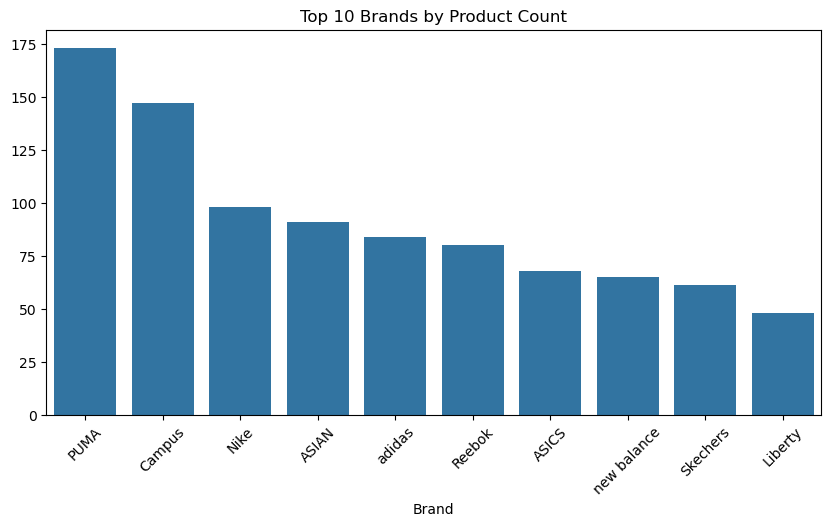

In [32]:
top_brands = final_df['Brand'].value_counts().head(10)
print(top_brands)

plt.figure(figsize=(10,5))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title("Top 10 Brands by Product Count")
plt.xticks(rotation=45)
plt.show()

## Price Distribution of Products

- Show spread and range of prices

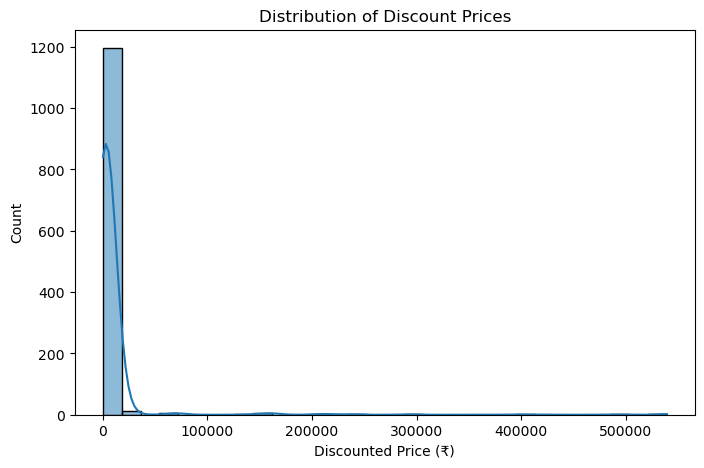

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(final_df['Discount_Price'], bins=30, kde=True)
plt.title("Distribution of Discount Prices")
plt.xlabel("Discounted Price (₹)")
plt.show()


## Rating Distribution Histogram

- Display overall customer rating pattern

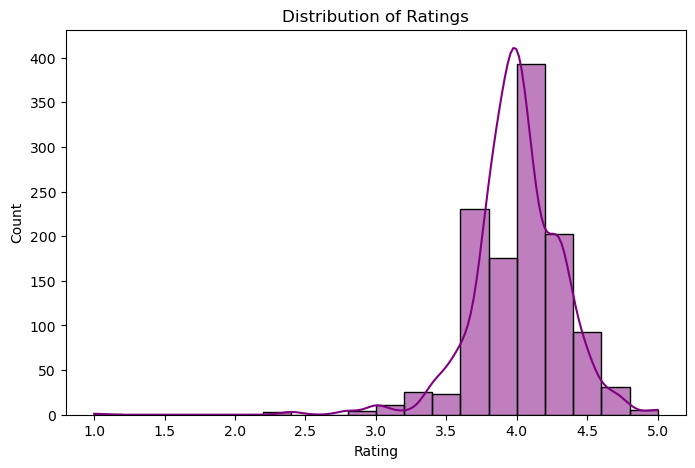

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(final_df['Rating'], bins=20, kde=True, color='purple')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.show()


## Percentage of Products with Active Deals (Availability)

- Show share of products under active deals

In [66]:
deal_counts = final_df['Availability'].notna().value_counts(normalize=True) * 100
print(deal_counts)

Availability
True     67.126623
False    32.873377
Name: proportion, dtype: float64


## Average Discount per Price Range

- Visualize average discount within price segments

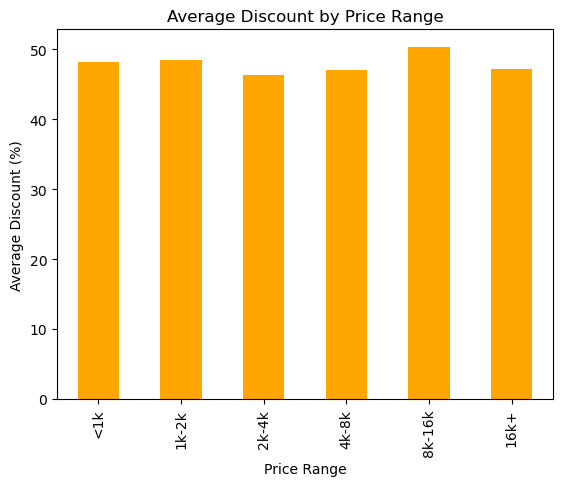

In [51]:
bins = [0, 1000, 2000, 4000, 8000, 16000, 32000]
labels = ['<1k', '1k-2k', '2k-4k', '4k-8k', '8k-16k', '16k+']

final_df['Price_Range'] = pd.cut(final_df['Discount_Price'], bins=bins, labels=labels)

price_discount = final_df.groupby('Price_Range', observed=True)['Discount'].mean()

price_discount.plot(kind='bar', color='orange')
plt.title("Average Discount by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Discount (%)")
plt.show()


## Top 10 Brands by Average Selling Price

- Compare average selling price among brands

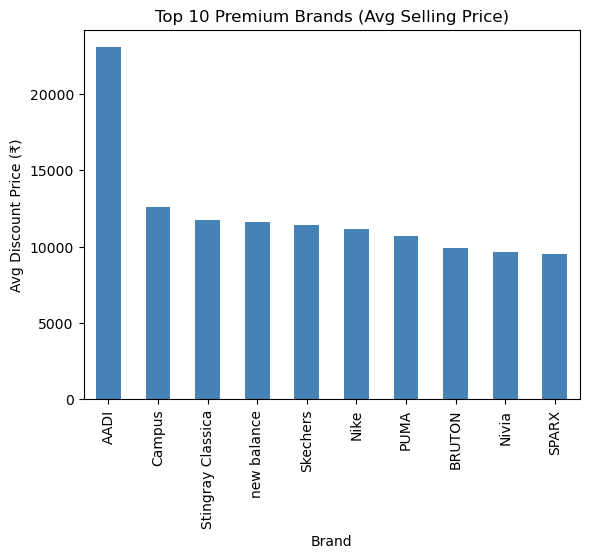

In [67]:
avg_price = final_df.groupby('Brand')['Discount_Price'].mean().sort_values(ascending=False).head(10)
avg_price.plot(kind='bar', color='steelblue')
plt.title("Top 10 Premium Brands (Avg Selling Price)")
plt.ylabel("Avg Discount Price (₹)")
plt.show()


## Availability Keyword Analysis

- Identify most common deal or delivery labels

Availability
Limited time deal    642
New Season           170
Ends in               13
Choice                 1
Amazon's               1
Name: count, dtype: int64


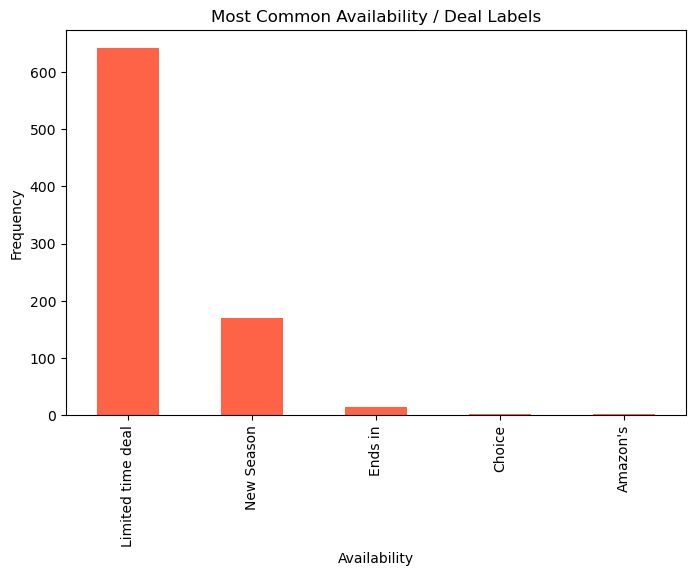

In [68]:
availability_counts = final_df['Availability'].value_counts().head(10)
print(availability_counts)

availability_counts.plot(kind='bar', figsize=(8,5), color='tomato')
plt.title("Most Common Availability / Deal Labels")
plt.ylabel("Frequency")
plt.show()


# Bivariate Analysis

## Average Discount Percentage by Brand

- Compare discount averages across brands

Brand
AVANT            63.250000
Vector X         58.500000
Bacca Bucci      56.571429
Sean McNamara    56.250000
Lancer           55.818182
LANCER           55.000000
NEOSAFE          53.750000
FAUSTO           53.000000
ATHCO            52.900000
Woodland         52.500000
Name: Discount, dtype: float64


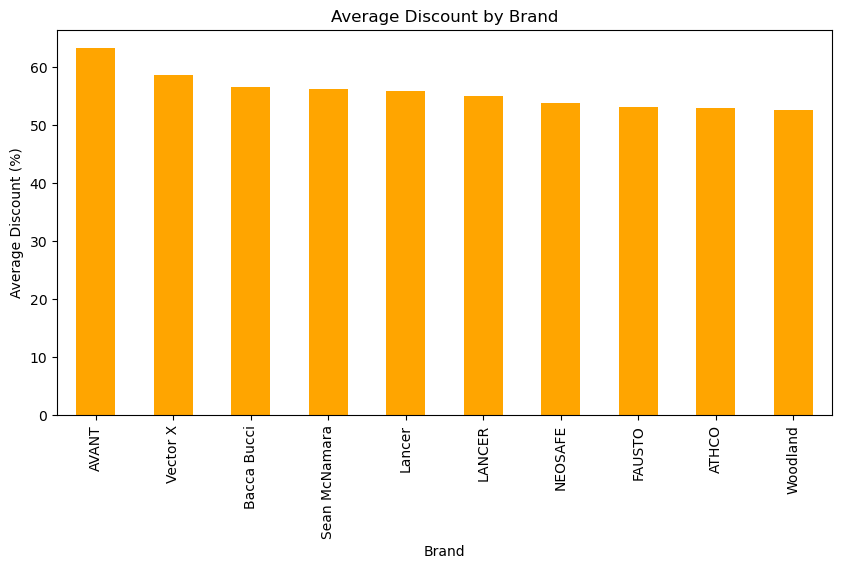

In [33]:
avg_discount = (
    final_df.groupby('Brand')['Discount']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

print(avg_discount)

plt.figure(figsize=(10,5))
avg_discount.plot(kind='bar', color='orange')
plt.title("Average Discount by Brand")
plt.ylabel("Average Discount (%)")
plt.show()


## Rating vs Discount Price

- Examine if high-rated products are expensive

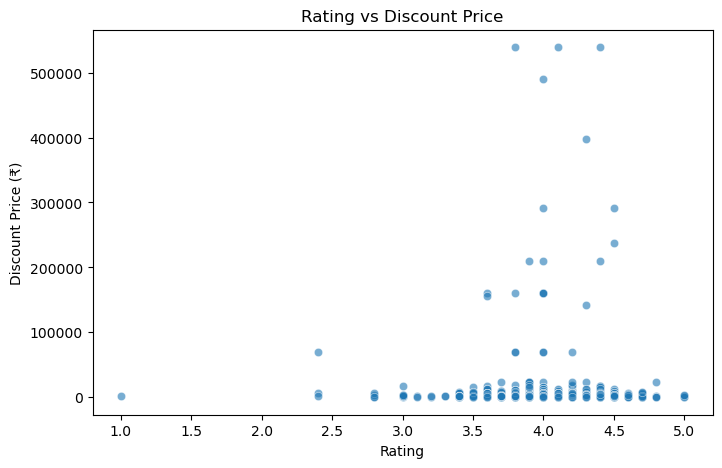

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Rating', y='Discount_Price', data=final_df, alpha=0.6)
plt.title("Rating vs Discount Price")
plt.xlabel("Rating")
plt.ylabel("Discount Price (₹)")
plt.show()


## Brand-Wise Average Rating

- Compare customer ratings among brands

Brand
AVANT              4.150000
HUNDRED            4.125000
Bacca Bucci        4.100000
Not specified      4.100000
AADI               4.090909
U.S. POLO ASSN.    4.086207
NEOSAFE            4.075000
Reebok             4.069231
adidas             4.053086
Butterfly          4.042857
Name: Rating, dtype: float64


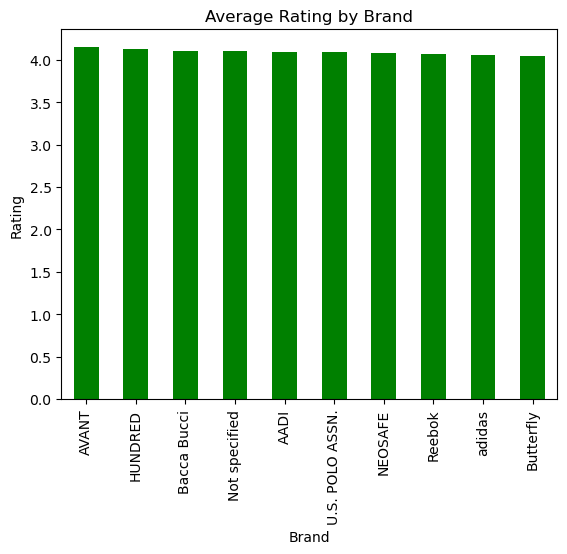

In [70]:
avg_rating = final_df.groupby('Brand')['Rating'].mean().sort_values(ascending=False).head(10)
print(avg_rating)

avg_rating.plot(kind='bar', color='green')
plt.title("Average Rating by Brand")
plt.ylabel("Rating")
plt.show()

## Discount vs Product Orders

- Explore effect of discounts on order volume

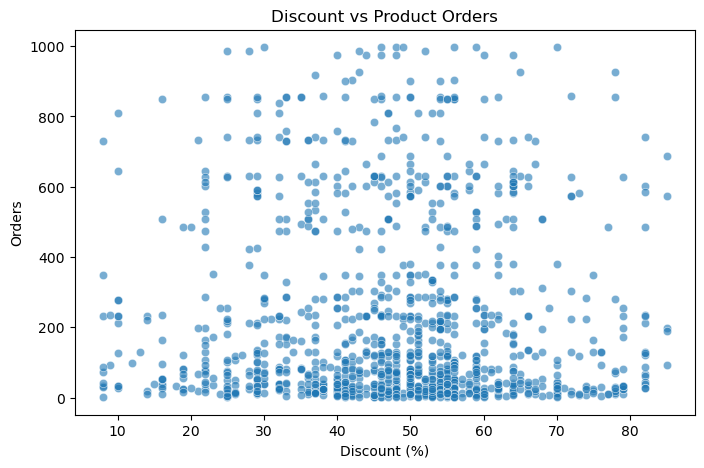

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Product_Orders', data=final_df, alpha=0.6)
plt.title("Discount vs Product Orders")
plt.xlabel("Discount (%)")
plt.ylabel("Orders")
plt.show()


## Brand Price Comparison (Box Plot)

- Compare price range and spread among brands

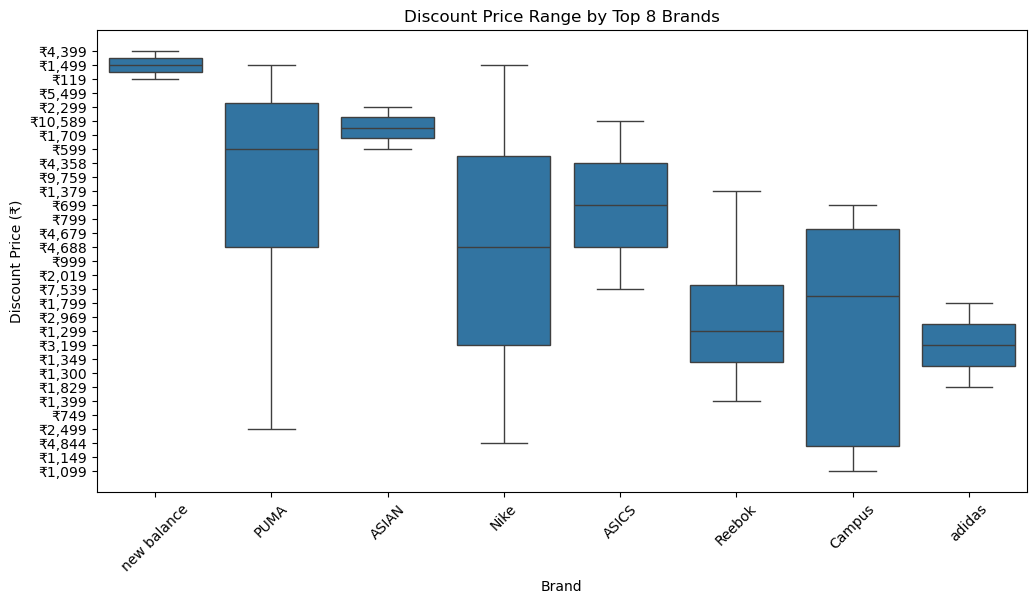

In [42]:
plt.figure(figsize=(12,6))
top_brands = final_df['Brand'].value_counts().head(8).index
sns.boxplot(x='Brand', y='Discount_Price', data=df[df['Brand'].isin(top_brands)])
plt.title("Discount Price Range by Top 8 Brands")
plt.xticks(rotation=45)
plt.ylabel("Discount Price (₹)")
plt.show()


## Average Rating vs Average Discount by Brand

- Compare discounts and ratings across brands

                 Rating   Discount
Brand                             
AVANT          4.150000  63.250000
Vector X       4.020000  58.500000
Bacca Bucci    4.100000  56.571429
Sean McNamara  3.725000  56.250000
Lancer         3.909091  55.818182
LANCER         3.600000  55.000000
NEOSAFE        4.075000  53.750000
FAUSTO         3.975000  53.000000
ATHCO          3.873684  52.900000
Woodland       3.980000  52.500000


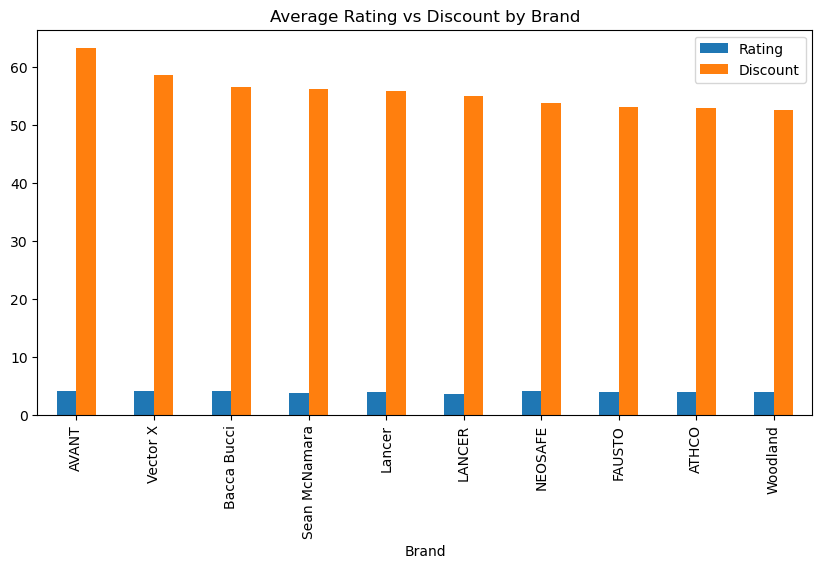

In [71]:
brand_analysis = final_df.groupby('Brand')[['Rating','Discount']].mean().dropna().sort_values('Discount', ascending=False).head(10)
print(brand_analysis)

brand_analysis.plot(kind='bar', figsize=(10,5))
plt.title("Average Rating vs Discount by Brand")
plt.show()


## Price vs Rating by Category

- Check relation between price and rating per category

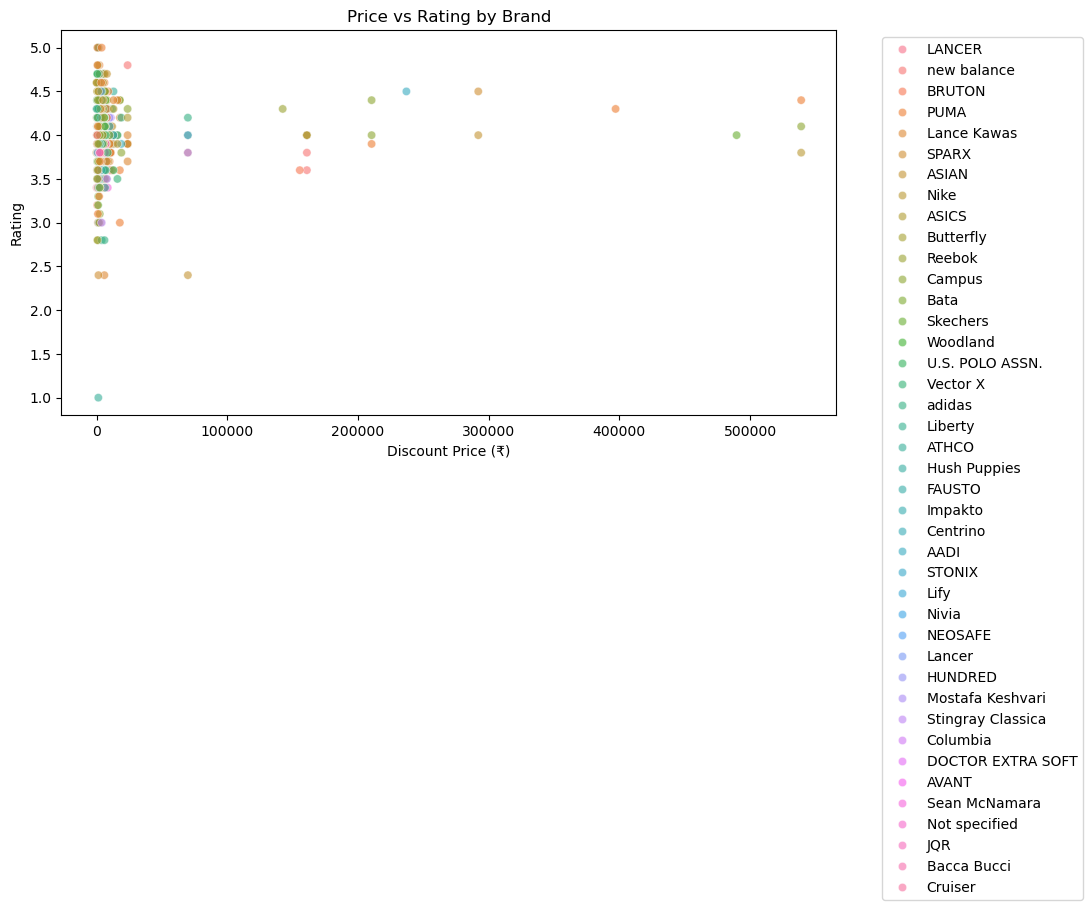

In [48]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Discount_Price', y='Rating', hue='Brand', data=final_df, alpha=0.6)
plt.title("Price vs Rating by Brand")
plt.xlabel("Discount Price (₹)")
plt.ylabel("Rating")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Discount Impact on Rating

- Evaluate if higher discounts affect ratings

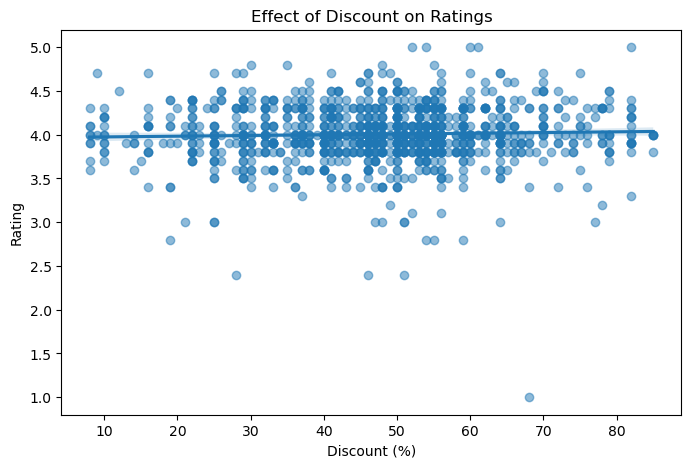

In [55]:
plt.figure(figsize=(8,5))
sns.regplot(x='Discount', y='Rating', data=final_df, scatter_kws={'alpha':0.5})
plt.title("Effect of Discount on Ratings")
plt.xlabel("Discount (%)")
plt.ylabel("Rating")
plt.show()


## Rating vs Orders (Popularity vs Satisfaction)

- Find connection between popularity and satisfaction

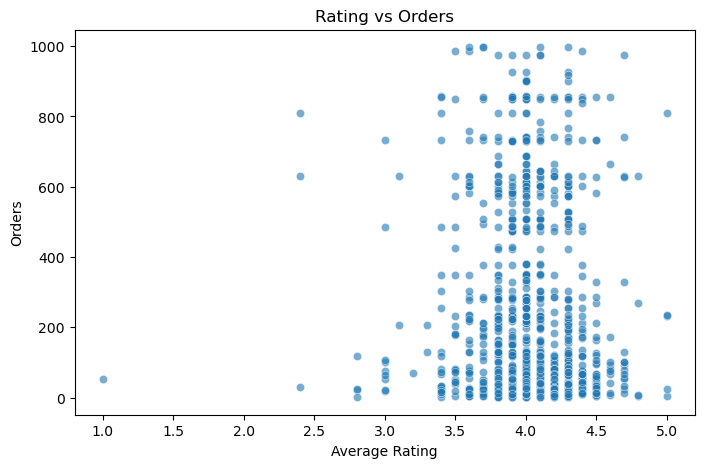

In [72]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Rating', y='Product_Orders', data=final_df, alpha=0.6)
plt.title("Rating vs Orders")
plt.xlabel("Average Rating")
plt.ylabel("Orders")
plt.show()

## Price Gap (Original vs Discount)

- Show how much customers save on average

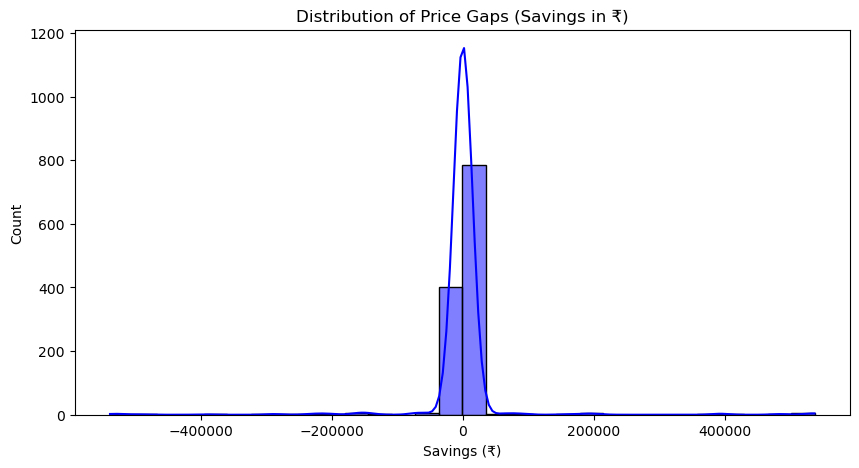

In [73]:
final_df['Price_Gap'] = final_df['Original_Price'] - final_df['Discount_Price']
plt.figure(figsize=(10,5))
sns.histplot(final_df['Price_Gap'], bins=30, kde=True, color='blue')
plt.title("Distribution of Price Gaps (Savings in ₹)")
plt.xlabel("Savings (₹)")
plt.show()

## Deal vs Non-Deal Product Comparison

- Compare average values for deal vs non-deal products

In [74]:
final_df['Has_Deal'] = final_df['Availability'].notna()
comparison = final_df.groupby('Has_Deal')[['Discount','Product_Orders','Rating']].mean()
print(comparison)


           Discount  Product_Orders    Rating
Has_Deal                                     
False     48.533333      209.308290  4.001018
True      47.182588      218.510278  4.008674


## Average Order Volume by Discount Range

- Show order behavior for different discount levels

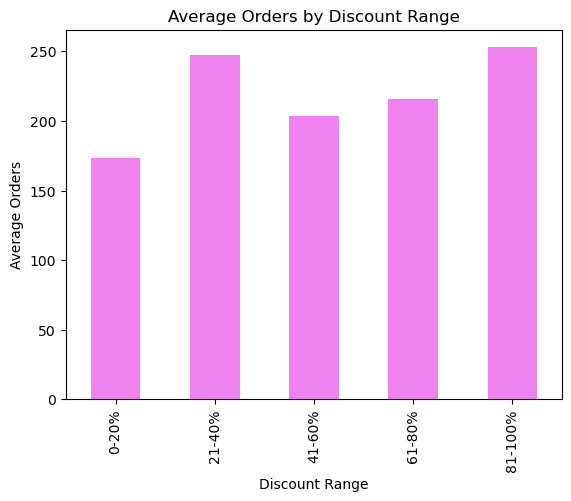

In [75]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%']

final_df['Discount_Range'] = pd.cut(final_df['Discount'], bins=bins, labels=labels)

order_discount = final_df.groupby('Discount_Range', observed=True)['Product_Orders'].mean()

order_discount.plot(kind='bar', color='violet')
plt.title("Average Orders by Discount Range")
plt.xlabel("Discount Range")
plt.ylabel("Average Orders")
plt.show()


## Brand Popularity vs Discount Comparison

- Show brand popularity vs average discount

                  Discount  Product_Orders
Brand                                     
NEOSAFE          53.750000      392.750000
Hush Puppies     43.444444      303.000000
new balance      47.400000      293.265625
Impakto          45.833333      292.833333
Lancer           55.818182      285.818182
Woodland         52.500000      280.000000
Bata             44.818182      273.500000
U.S. POLO ASSN.  46.344828      263.103448
Skechers         49.180328      262.716667
Reebok           48.775000      254.139241


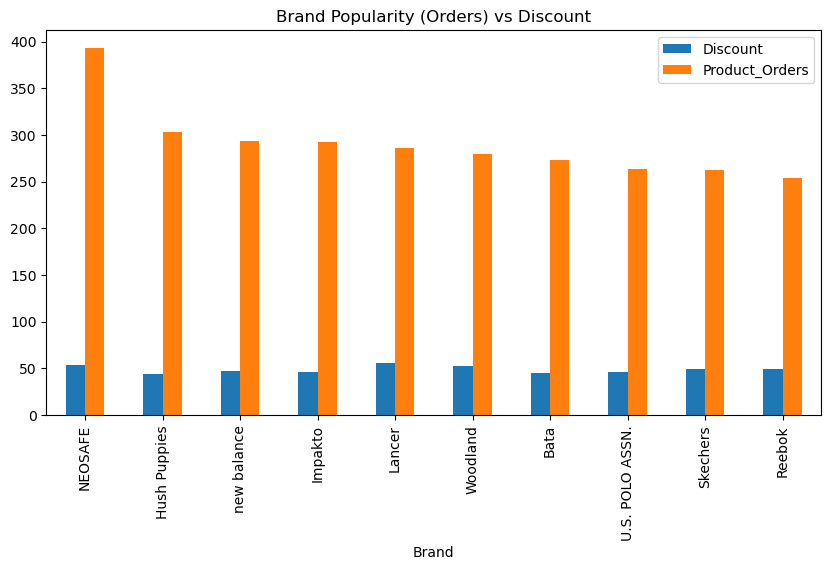

In [76]:
brand_pop_discount = final_df.groupby('Brand')[['Discount','Product_Orders']].mean().sort_values('Product_Orders', ascending=False).head(10)
print(brand_pop_discount)

brand_pop_discount.plot(kind='bar', figsize=(10,5))
plt.title("Brand Popularity (Orders) vs Discount")
plt.show()

# Multivariate Analysis

## Correlation Heatmap for All Numeric Fields

- Understand relation between discount and price
- Understand relation between all Numerical Columns of Heatmap

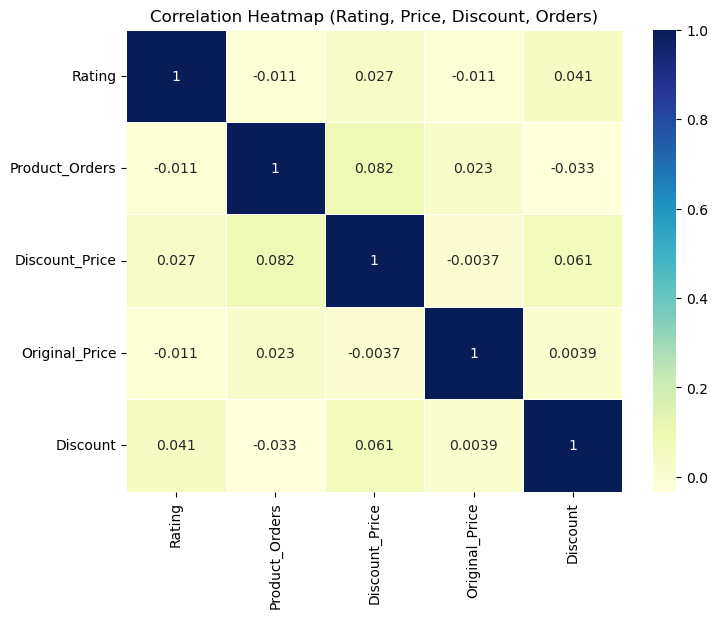

In [88]:
num_cols = ['Rating', 'Product_Orders', 'Discount_Price', 'Original_Price', 'Discount']
corr_df = final_df[num_cols].dropna()

plt.figure(figsize=(8,6))
sns.heatmap(corr_df.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap (Rating, Price, Discount, Orders)")
plt.show()

                Discount_Price  Original_Price  Discount
Discount_Price        1.000000       -0.003781  0.064627
Original_Price       -0.003781        1.000000  0.003977
Discount              0.064627        0.003977  1.000000


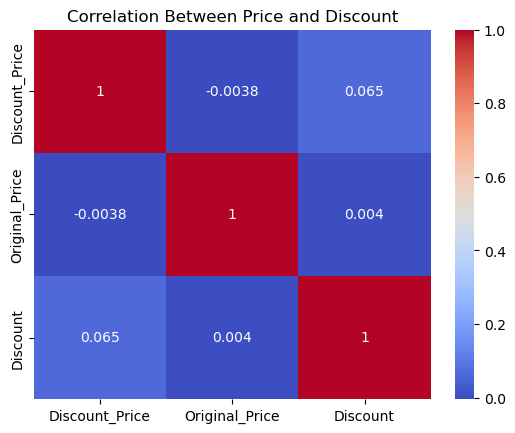

In [78]:
corr = final_df[['Discount_Price', 'Original_Price', 'Discount']].corr()
print(corr)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Price and Discount")
plt.show()

## Profit Margin Estimation (Simulated Metric)

- Show estimated margin distribution across dataset

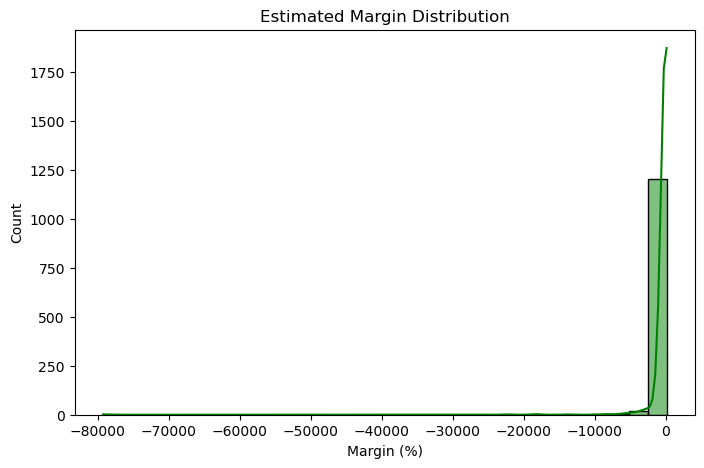

In [53]:
final_df['Margin_Estimate'] = (final_df['Original_Price'] - final_df['Discount_Price']) / final_df['Original_Price'] * 100
plt.figure(figsize=(8,5))
sns.histplot(final_df['Margin_Estimate'], bins=30, kde=True, color='green')
plt.title("Estimated Margin Distribution")
plt.xlabel("Margin (%)")
plt.show()


## Price vs Rating vs Orders

- Show estimated distribution across dataset

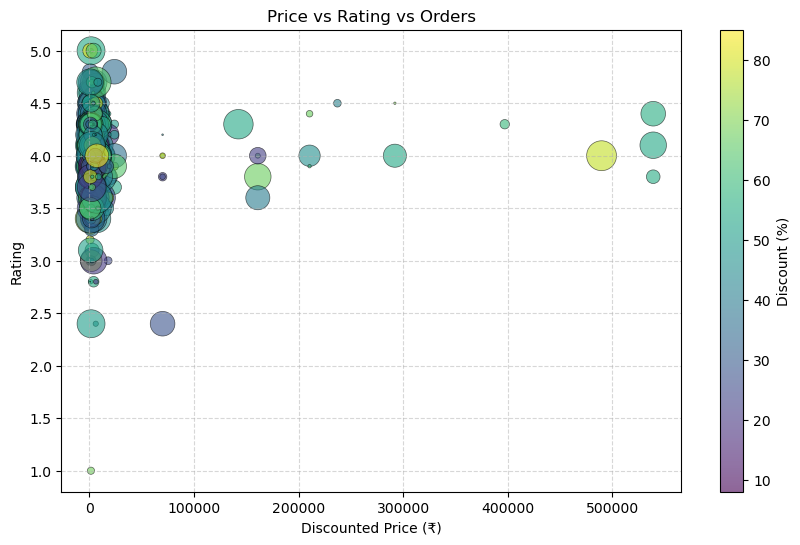

In [83]:
plt.figure(figsize=(10,6))
df = final_df.dropna(subset=['Discount_Price','Rating','Product_Orders'])

plt.scatter(df['Discount_Price'], df['Rating'],
            s=df['Product_Orders']/2, c=df['Discount'],
            cmap='viridis', alpha=0.6, edgecolors='k', linewidth=0.5)

plt.colorbar(label='Discount (%)')
plt.title("Price vs Rating vs Orders")
plt.xlabel("Discounted Price (₹)")
plt.ylabel("Rating")
plt.grid(ls='--', alpha=0.5)
plt.show()


## Brand popularity vs average discount vs product orders

- Compare grouped metrics

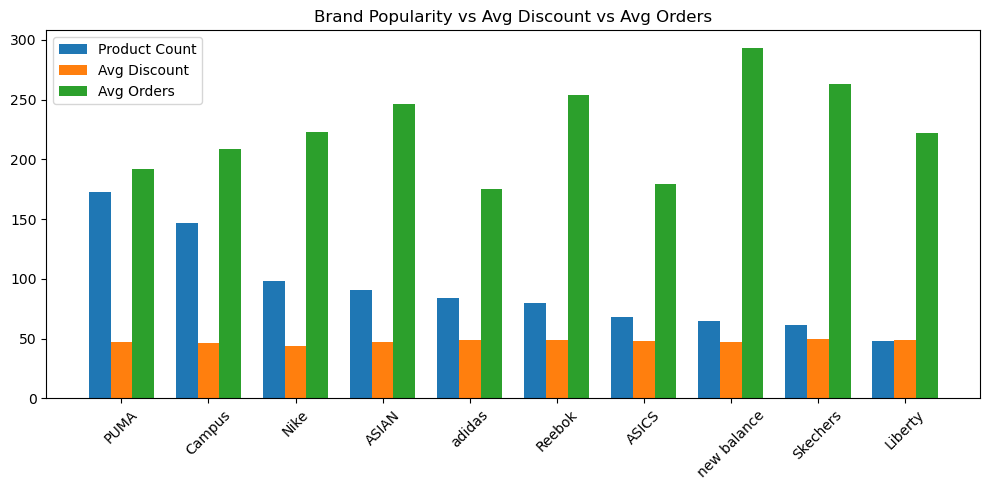

In [82]:
brand_stats = final_df.groupby('Brand').agg({
    'Product_Orders': 'mean',
    'Discount': 'mean'
})
brand_stats['Popularity'] = final_df['Brand'].value_counts()
top = brand_stats.nlargest(10, 'Popularity')

# Plot
x = np.arange(len(top))
w = 0.25

plt.figure(figsize=(10,5))
plt.bar(x - w, top['Popularity'], w, label='Product Count')
plt.bar(x, top['Discount'], w, label='Avg Discount')
plt.bar(x + w, top['Product_Orders'], w, label='Avg Orders')

plt.xticks(x, top.index, rotation=45)
plt.title('Brand Popularity vs Avg Discount vs Avg Orders')
plt.legend()
plt.tight_layout()
plt.show()

# Overall Final Summary

## Data Understanding:

- Explored the dataset to identify categorical and numerical fields such as Brand, Category, Rating, Discount_Price, Original_Price, and Discount. Reviewed data completeness and detected missing values, particularly in Rating, Product_Orders, and Availability columns.

## Data Cleaning:

- Handled missing and inconsistent entries using replacement and filtering techniques. Extracted numeric discount values from text and standardized price columns for uniform analysis. Removed rows containing more than three missing values to maintain dataset accuracy and integrity.

## Univariate Analysis:

- Analyzed individual features such as Price, Discount, and Rating to understand their overall distribution and variation. Identified dominant brands, popular price ranges, and the spread of customer ratings across different footwear products.

## Bivariate Analysis:

- Explored relationships between key variables like Discount vs Orders, Price vs Rating, and Brand vs Average Discount using scatterplots and bar charts. Observed that mid-priced footwear often receives more orders and better ratings compared to both low- and high-priced products.

## Multivariate Analysis:

- Used correlation heatmaps and bubble charts to visualize the combined relationships among Price, Discount, Rating, and Orders. Discovered that moderate discounts correlate with higher purchase volumes, while extreme discounts show inconsistent rating patterns.

# Insights Gained:

- PUMA, Campus, and Nike dominate listings, indicating strong brand presence.

- Mid-range footwear (₹1,000–₹4,000) attracts the most customers.

- Discounts between 30–50% tend to drive higher sales without reducing perceived product quality.

- Well-rated products are not always the most expensive, suggesting good value options in mid-tier segments.

# Conclusion:

The Footalytica dataset is clean, structured, and ready for analytical use.
All missing and inconsistent data have been addressed.
Exploratory analyses (univariate, bivariate, multivariate) were effectively performed, revealing clear pricing, discount, and rating patterns.
The analysis provides actionable insights that can help brands refine pricing strategies, enhance customer engagement, and strengthen their competitive position in the online footwear market.